# Project 1: One-Dimensional Poisson Equaiton
### Justin Byrne, Computational Physics, Michigan State University

   There are many physical problems in science that requre the sollution of the Poisson equation. In mathematics, Poisson's equation is a partial differential equation of elliptic type with broad utility in electrostatics, mechanical engineering, and theroetical physics. Its application is usefull in the analysis of second order differential equations. The one-dimensional Poissson equation with Dirichlet boundary conditions is solvable simply by rewriting it as a system of linear equations. Many situations can be described in terms of a vector quantities and thus evaluated with the use of linear algebra. The standard notation of a second order differential equation that could be solved using Poisson's equation is as follows
$$
d^2y/dx^2+k^2(x)y=f(x)
$$

###### Poisson's Equation
The most general expression for Poisson's Equation takes the following form:

\begin{equation}
\nabla^2\varphi = f \hspace{1.5cm}(1.1)
\end{equation}

In this case \nabla is Laplacian Operator and $f$ and $\nabla$ are real or complex functions on a manifold.

###### Spherically Symmetric Charge Distribution
We can use Poisson's equation to succinctly describe the electric potential ($\Phi$) due to an arbitrary charge distribution.

\begin{equation}
\varphi\rightarrow\Phi\hspace{1cm}\&\hspace{1cm}f \rightarrow -4\pi\rho(r) \\
\nabla^2\Phi = -4\pi\rho(r)\hspace{1.5cm}(1.2)
\end{equation}

For a system with spherical symmetry you cannot tell the difference between any two points at a given distance $r$ from the origin.  Mathematically this implies that your model must carry no angular dependence.  Under these conditions the Laplacian operator ($\nabla^2$) in eq.(1.2) simplifies considerably.  The angular derivatives are trivially zero and the partial in $r$ becoming an ordinary derivative.  Poisson's equation takes the following form.

\begin{equation}
\frac{1}{r^2}\frac{d}{dr}(r^2\frac{d\Phi}{dr}) = -4\pi\rho(r)\hspace{1.5cm}(1.3) 
\end{equation}

A substitution of $\Phi(r)=\phi(r)/r$ cleans up eq.(1.3).

\begin{equation}
\frac{d^2\phi}{dr^2} = -4\pi r\rho(r)\hspace{1.5cm}(1.4)
\end{equation}

###### Reclaiming Generality
By sending $\phi\rightarrow u$ and $r\rightarrow x$ we make a return to generality.

\begin{equation}
-u''(x)=f(x)\hspace{1.5cm}(1.5)
\end{equation}

# The Problem
In order to solve a one-dimensional Poisson equation with fixed boundary conditions we must teach a computer how to, first, be able to solve for the first and second dirivatives, and also, to use arrays to solve the system of vector quantities in a matricy. In order to create a computer generated solution we must translate eq.(1.5) into a format which the computer can efficiently solve one step at a time.  Computers cannot handle differential equations analytically and therefore we must make the problem into a $\textit{difference}$ equation, rather than a differential equation.  A difference equation works in descrete space and accurately approximates its differential counter part if the quantization of that space is sufficiently small.  This idea can be grasped firmly by careful examination of the definition of the derivative, otherwise known as Euler's foreward formula.

\begin{equation}
\frac{df(x)}{dx} = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}\hspace{1.5cm}(2.1)
\end{equation}

The only way a computer can approach solving for a derivative is through a sum of decresingly sized descrete values, which will result in the solution approaching the true value. This is not unlike how a Riemann sum approximates the value of an integral; the more partitions that are made the smaller each one will be which leads to the final sum of all partitions to have a more accurate solution. The function used to descibe a dirivative must be broken down in a way so that the computer can analyze the  smaller and smaller contributions the functions gives as $h$ approaches $0$. The method in which we do this is whith a Taylor Expansion.

\begin{equation}
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n\hspace{1.5cm}(2.2)
\end{equation}

We expand $f(x)$ a distance $\pm h$ about $x_0=0$ to obtain two different expansions for f(x).  I will call the expansion with $+h$ the top expansion and the expansion with $-h$ the bottom expansion.  We carry our expansions out to the $3^{rd}$ order terms.

\begin{equation}
f_{x+h} \approx f_0 + hf' + \frac{h^2f''}{2} + \frac{h^3f'''}{6} + O(h^4) \hspace{1.5cm}(2.3)\\
f_{x-h} \approx f_0 - hf' + \frac{h^2f''}{2} - \frac{h^3f'''}{6} + O(h^4) \hspace{1.5cm}(2.4)
\end{equation}

This leads to Taking the sum of eq.(2.3) & eq.(2.4) and solving for expressions of both the first dirivative, f', and the second, f''. 

\begin{equation}
f' \approx \frac{f(x+h) - f(x-h){2h}} + O(h^2) \hspace{1.5cm}(2.5)
\end{equation}

\begin{equation}
f'' \approx \frac{f(x+h) + f(x-h) - 2f_0}{h^2} \hspace{1.5cm}(2.6)
\end{equation}

 We restrict the domain of our solutions to $x\in (0,1)$ with initial conditions $u(0) = u(1) = 0$.  Next we seek to restate eq.(1.5) as a matrix.  We quantize the space on the interval $(0,1)$ using $h = 1/(n+1)$ (where n is the number of steps) and $x_i = ih$ with $x_0=0$ and $x_{n+1}=1$. Construct a vector $\vec{v}$ to represent a descrete approximation to $u$.  The given boundary conditions give us $v_0 = v_{n+1} = 0$   We can use equation 2.6 to approximate u''(x) and rewrite eq.(1) with $f_i = f(x_i)$ where $f(x_i)$ represents the source function evaluated at $x_i$.

\begin{equation}
f_i = \frac{2v_i - v_{i+1} - v_{i-1}}{h^2} \hspace{1.5cm}(2.7)
\end{equation}

The matrix representation will look something like this with $\widetilde{b_i}=h^2f_i$.

\begin{equation}
\textbf{A}\vec{v}=\widetilde{b}\hspace{1.5cm}(2.8)
\end{equation}

The diagonal elements will pick out $v_0$ and must contain a factor of 2.  The elements $v_{i-1}$ and $v_{i+1}$ on either side of the diagonal must have factors of -1. This means that $\textbf{A}$ takes the form below.

\begin{bmatrix}
2  & -1 & 0  & 0 & ... & 0  \\
-1 &  2 & -1 & 0 & ... & 0  \\
0  & -1 &  2 & -1& ... & 0  \\
...& ...& ...&...&  2  & -1 \\
...& ...& ...&...& -1  &  2 \\
\end{bmatrix}

### Analytical Solution

Elapsed time: 0.0489659309387207 seconds


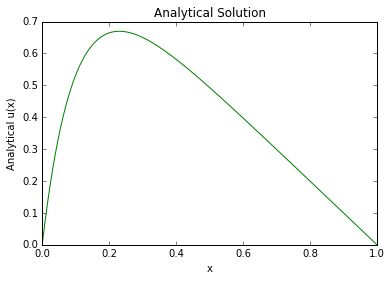

In [1]:
#timer
import time
start_time_sol = time.time()

from array import *
import math
Sol = array('f');X_sol = array('f') 
n_sol=10000;h = (1)/(n_sol+1);x = 0
def u(x_i):
    u = 1 - (1 - math.exp(-10))*x_i - math.exp(-10*x_i)
    return u;
i=0
while (x < 1+h):X_sol.append(x);Sol.append(u(x));x = x + h;i=i+1
#print("Initial Point:", Sol[1]); #Initial Point
print("Elapsed time: %s seconds" % (time.time() - start_time_sol))
    
#Plotting
from pylab import *
%matplotlib inline
xlabel("x")
ylabel("Analytical u(x)")
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.7])
title("Analytical Solution")
plot(X_sol,Sol,color='green')

### Solution to Poisson Equation Using a Diagonizable Matrix

In order to program the computer solve problems in matrix algebra for any matrix of size $n * n$ we must once again give find a step-by-step general solution. The matrix used in solving the Poisson Equation is clearly diagonizable as previously discussed and therefore allows us to solve for an analytical solution for the computer to implement in a given matrix. The way we do this is through the elementary row operations used in Gaussian Elimination. We will first transform the matrix elements with a forward substitution and then use a backwards substitution to get the results.  The transformed matrix elements are capped with a tilda (~).  We will represent our matrix $\textbf{A}$ as follows

\begin{bmatrix}
d_1  & e_1 & 0  & 0 & ... & ... & 0 \\
e_1 &  d_2 & e_2 & 0 & ... & ... & 0 \\
0  & e_2 &  d_3 & e_3& ... & ... & 0 \\
...& ...& ...&...& ...& ...& ... & 0 \\
...& ...& ...&...& ...& ...& ... & 0 \\
...& ...& ...&...& ... & d_{n-1} & e_{n-1} \\
...& ...& ...&...&  0 &  e_{n-1}  & d_n
\end{bmatrix}

Where A is within the domain of $ R^{n*n} $
In reducing the matrix through row operations the first step is to make the first element of the second row, $a_{21}$ zero by subtracting the ratio of the elements $a_{11}/a_{21}$. From operations like these the element $a_{11}$ will remain the same after transformations and so will the first element in the solution vector, $b_{1}$. These operations are all applied equally to the solutions vector where B is within the domain of $B^{41}$.

Therefore when n = 1:

\begin{align*}
I. d_1 = \widetilde{d_1} \\\\
II. b = \widetilde{b_1}
\end{align*}

For n = 2,3,4....

\begin{align*}
I. \widetilde{d_i} = d_i - \frac{e_{i-1}^2}{\widetilde{d_{i-1}}} \\\\
II. \widetilde{b_i} = b_i - \widetilde{b_{i-1}}\frac{e_{i-1}}{\widetilde{d_{i-1}}}
\end{align*}

After transformation our matrix will look like this

\begin{bmatrix}
d_1  & e_1 & 0  & 0 & ... & ... & 0 \\
0 &  \widetilde{d_2} & e_2 & 0 & ... & ... & 0 \\
0  & 0 &  \widetilde{d_3} & e_3& ... & ... & 0 \\
...& ...& ...&...& ... & ... & 0 \\
...& ...& ...&...&  0 &  0  & \widetilde{d_n}
\end{bmatrix}

The nth row gives us the equation 

\begin{equation}
\widetilde{d_n}x_n = \widetilde{b_4}
\end{equation}

Which can easily be solved for the nth element of vector x, which is also within the domain $X^{n*1}$.

\begin{equation}
x_n = \frac{\widetilde{b_4}}{\widetilde{d_n}}
\end{equation}

Now we can begin the back substitution and find every other element in x with the following formula.

\begin{equation}
x_i = \frac{\widetilde{b_i}-e_ix_{i+1}}{\widetilde{d_i}}
\end{equation}

## Program to Solve Matrix Algebra through Gaussian Elimination

For the function we are going to use as a sample function to convert into matrix form and perform operations on will be $f(x) = 100e^{-10x}$. This is a one-dimensional poisson equation with the form $-u''(x) = f(x)$. This will give the poisson equation an analytical solution of $u(x) = 1-(1-e^{10})x-e^{10x}$.

Elapsed time algorithm: 0.09258818626403809 seconds
Elapsed time total: 0.13390302658081055 seconds


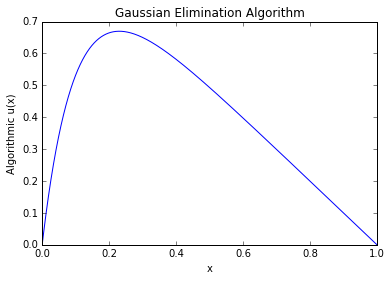

In [2]:
#timer
import time
start_time_at2_total = time.time()

#Import the array module  
from array import *
import math 

#Bounds, Step number n & Stepsize h
x_0 = 0.0;x_f = 1.0
n=10000
h = (x_f - x_0)/(n+1)
#Initial Point
x = x_0 + h

'''
Summary of Notation:
d = diagonal elements of A
e = off diagonal elements of A
b = elements of solution vector b
'''
d = array('d',[2])
e = array('d',[-1])
b = array('d',[h*h*100*math.exp(-10*x)])
while (x < x_f - h):
    d.append(2)
    e.append(-1)
    x = x + h
    b.append(h*h*100*math.exp(-10*x)) 

#Algorithm timer
start_time_at2_algorithm = time.time()
'''
Summary of Notation:
dnew = d tilda
bnew = b tilda
i = array index
'''
#Forward Substitution
x = x_0 + h
dnew = array('d',[d[0]])
bnew = array('d',[b[0]])
i = 1
while (x < x_f - h):
    dnew.append(d[i]-e[i-1]**2/dnew[i-1])
    bnew.append(b[i]-e[i-1]*bnew[i-1]/dnew[i-1])
    i = i + 1
    x = x + h

#free up some memeory
del d,b

i = i - 1
#Backwards Substitution
X_algorithm = array('d',[0,bnew[-1]/dnew[-1]])
x_coor = array('d',[1,x]) #for plotting later
j=1 #Keeps track of the index of x which runs backwards with respect to i
while (x >= x_0 + h):
    X_algorithm.append((bnew[i]-e[i]*X_algorithm[j])/dnew[i])
    #Free up memory as we go along
    bnew.pop();dnew.pop()
    i = i - 1
    j = j + 1
    x = x - h
    x_coor.append(x)

#Boundary Values
X_algorithm.append(0)
x_coor.append(0)
print("Elapsed time algorithm: %s seconds" % (time.time() - start_time_at2_algorithm))
print("Elapsed time total: %s seconds" % (time.time() - start_time_at2_total))

#Plotting
from pylab import *
%matplotlib inline
xlabel("x")
ylabel("Algorithmic u(x)")
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.7])
title("Gaussian Elimination Algorithm")
plot(x_coor,X_algorithm,color='blue')

## Program for Evaluation of Matrix using LU Decomposition

Lower-Upper Decomposition is another technique for evaluating matrix equations. It revolves around the characteristic of reducible matricies that a determinant can be calculated to describe certain properties of the matrix. The determinant is espessially useful in performing algebraic operations on the matrix used. The matrix that we are using to solve the Poisson equation is a square reducible matrix and its determinant can be determined by once agian using row operations to reduce the matrix into upper triangular form and also into lower triangular form. Once again the transformations that are applied to the rows in the matrix, A, are also applied to the vector, b. These two triangular form matricies are now two factors of the original matrix, A.

\begin{equation}
\hat{A} = \hat{L} * \hat{U} \hspace{1.5cm}(4.1)
\end{equation}

\begin{equation}
det(A) = det(\hat{L} \hat{U}) = det(\hat{L})det(\hat{U}) \hspace{1.5cm}(4.2)
\end{equation}


LU solve time: 0.10155105590820312 seconds
Total Elapsed time: 3.743614912033081 seconds


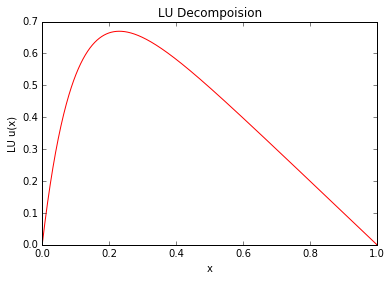

In [3]:
from pylab import *
import numpy as np
#timer
import time
start_time_LU_total = time.time()

x_0 = 0.0;x_f = 1.0
n=1000
h = (x_f - x_0)/(n+1)

#Create the Matrix A
A_row1 = np.empty([n]);A_row1[0] = 2;A_row1[1] = -1;
i = 2
while(i<=n-1):A_row1[i] = 0;i = i+1
A_row2 = np.empty([n]);A_row2[0] = -1;A_row2[1] = 2;A_row2[2] = -1
i = 3
while(i<=n-1):A_row2[i] = 0;i = i+1    

A = np.vstack((A_row1,A_row2))

i = 1
while (i<=n-3):A_row2=np.roll(A_row2,1);A=np.vstack((A,A_row2));i=i+1

#Deals with the wrap around from np.roll
A_last=np.roll(A_row2,1);A_last[0]=0
A=np.vstack((A,A_last))

#Create space vector X
X_coor = np.empty([n])
#Create the Vector b
b = np.empty([n])
x = x_0 + h
i=0
while (x < x_f-h):
    b[i] = h*h*100*math.exp(-10*x)
    X_coor[i] = x
    x = x + h
    i = i+1

#Timer for LU decomposition    
start_time_LU = time.time()
#Solve the System
x_LU = linalg.solve(A,b)

#free up memory
del A,b

#Boundary Conditions
X_coor = np.insert(X_coor, 0, x_0);x_LU = np.insert(x_LU, 0, 0)
X_coor = np.insert(X_coor, n, x_f);x_LU = np.insert(x_LU, n, 0)

print("LU solve time: %s seconds" % (time.time() - start_time_LU))
print("Total Elapsed time: %s seconds" % (time.time() - start_time_LU_total))

#Plotting
%matplotlib inline
xlabel("x")
ylabel("LU u(x)")
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,0.7])
title("LU Decompoision")
plot(X_coor,x_LU,color='red')